In [85]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize

In [86]:
tickers=['^GSPC','GC=F']

In [87]:
df=yf.download(tickers,start='2010-01-01')['Adj Close']
df

[*********************100%%**********************]  2 of 2 completed


,GC=F,^GSPC
Date,,
2010-01-04,1117.699951,1132.989990
2010-01-05,1118.099976,1136.520020
2010-01-06,1135.900024,1137.140015
2010-01-07,1133.099976,1141.689941
2010-01-08,1138.199951,1144.979980
...,...,...
2024-06-14,2331.399902,5431.600098
2024-06-17,2312.399902,5473.229980
2024-06-18,2330.399902,5487.029785


<Axes: xlabel='Date'>

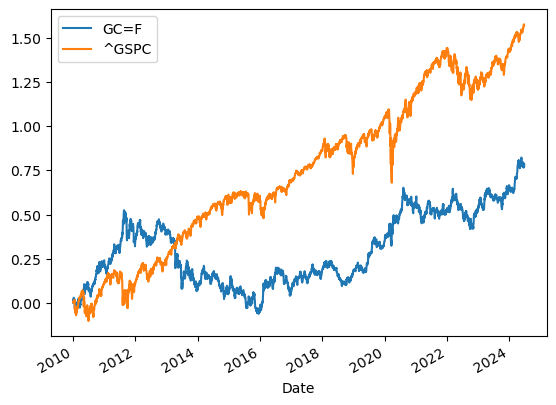

In [88]:
ret_df=np.log(df/df.shift(1))
ret_df.cumsum().plot()

In [89]:
W=np.ones(len(ret_df.columns))/np.ones(len(ret_df.columns)).sum()
W

array([0.5, 0.5])

In [90]:
def sharpe_pf(W,returns):
    pf_risk=(W.dot(returns.cov()).dot(W)) ** 0.5
    SR=W.dot(returns.mean()) / pf_risk
    return -SR

In [91]:
sharpe_pf(W,ret_df)

-0.04242531611230571

In [92]:
cons=({"type":"eq","fun":lambda x: np.sum(x)-1})

In [93]:
res=minimize(sharpe_pf,W,ret_df,constraints=cons)

In [94]:
res

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.04396428601247431
       x: [ 3.552e-01  6.448e-01]
     nit: 5
     jac: [ 8.543e-05 -4.705e-05]
    nfev: 15
    njev: 5

In [95]:
opt_W=res['x']

In [96]:
opt_W

array([0.35516169, 0.64483831])

In [97]:
ret_df.dot(opt_W).cumsum()

Date
2010-01-04         NaN
2010-01-05    0.002133
2010-01-06    0.008094
2010-01-07    0.009793
2010-01-08    0.013243
                ...   
2024-06-14    1.302796
2024-06-17    1.304814
2024-06-18    1.309191
2024-06-20    1.311109
2024-06-21    1.304412
Length: 3642, dtype: float64

In [98]:
ret_df.dot(W).cumsum()

Date
2010-01-04         NaN
2010-01-05    0.001734
2010-01-06    0.009904
2010-01-07    0.010667
2010-01-08    0.014351
                ...   
2024-06-14    1.184068
2024-06-17    1.183794
2024-06-18    1.188930
2024-06-20    1.192661
2024-06-21    1.183871
Length: 3642, dtype: float64

In [99]:
1-np.arange(0,1,0.01)

array([1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.94, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.8 , 0.79,
       0.78, 0.77, 0.76, 0.75, 0.74, 0.73, 0.72, 0.71, 0.7 , 0.69, 0.68,
       0.67, 0.66, 0.65, 0.64, 0.63, 0.62, 0.61, 0.6 , 0.59, 0.58, 0.57,
       0.56, 0.55, 0.54, 0.53, 0.52, 0.51, 0.5 , 0.49, 0.48, 0.47, 0.46,
       0.45, 0.44, 0.43, 0.42, 0.41, 0.4 , 0.39, 0.38, 0.37, 0.36, 0.35,
       0.34, 0.33, 0.32, 0.31, 0.3 , 0.29, 0.28, 0.27, 0.26, 0.25, 0.24,
       0.23, 0.22, 0.21, 0.2 , 0.19, 0.18, 0.17, 0.16, 0.15, 0.14, 0.13,
       0.12, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.06, 0.05, 0.04, 0.03, 0.02,
       0.01])

C:\Users\safde\AppData\Local\Temp\ipykernel_3844\3554616020.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(sharpes).plot()


<Axes: >

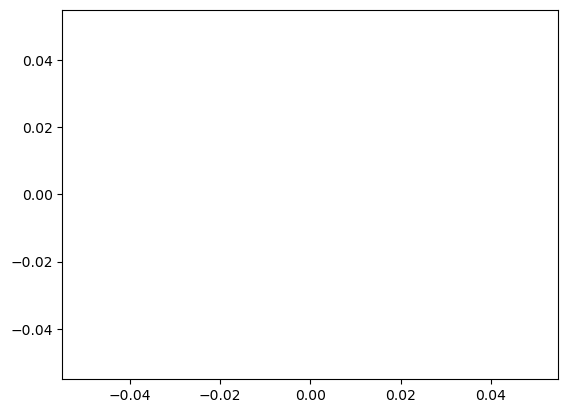

In [100]:
pd.Series(sharpes).plot()

In [101]:
pd.Series(sharpes).nsmallest(1)

C:\Users\safde\AppData\Local\Temp\ipykernel_3844\2042497610.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  pd.Series(sharpes).nsmallest(1)


Series([], dtype: float64)

In [102]:
sharpes=[]
for w in np.arange(0,1,0.01):
    weights=w,1-w
    weights=np.array(weights)
    print(weights)
    sharpes.append(sharpe_pf(weights,ret_df))

[0. 1.]
[0.01 0.99]
[0.02 0.98]
[0.03 0.97]
[0.04 0.96]
[0.05 0.95]
[0.06 0.94]
[0.07 0.93]
[0.08 0.92]
[0.09 0.91]
[0.1 0.9]
[0.11 0.89]
[0.12 0.88]
[0.13 0.87]
[0.14 0.86]
[0.15 0.85]
[0.16 0.84]
[0.17 0.83]
[0.18 0.82]
[0.19 0.81]
[0.2 0.8]
[0.21 0.79]
[0.22 0.78]
[0.23 0.77]
[0.24 0.76]
[0.25 0.75]
[0.26 0.74]
[0.27 0.73]
[0.28 0.72]
[0.29 0.71]
[0.3 0.7]
[0.31 0.69]
[0.32 0.68]
[0.33 0.67]
[0.34 0.66]
[0.35 0.65]
[0.36 0.64]
[0.37 0.63]
[0.38 0.62]
[0.39 0.61]
[0.4 0.6]
[0.41 0.59]
[0.42 0.58]
[0.43 0.57]
[0.44 0.56]
[0.45 0.55]
[0.46 0.54]
[0.47 0.53]
[0.48 0.52]
[0.49 0.51]
[0.5 0.5]
[0.51 0.49]
[0.52 0.48]
[0.53 0.47]
[0.54 0.46]
[0.55 0.45]
[0.56 0.44]
[0.57 0.43]
[0.58 0.42]
[0.59 0.41]
[0.6 0.4]
[0.61 0.39]
[0.62 0.38]
[0.63 0.37]
[0.64 0.36]
[0.65 0.35]
[0.66 0.34]
[0.67 0.33]
[0.68 0.32]
[0.69 0.31]
[0.7 0.3]
[0.71 0.29]
[0.72 0.28]
[0.73 0.27]
[0.74 0.26]
[0.75 0.25]
[0.76 0.24]
[0.77 0.23]
[0.78 0.22]
[0.79 0.21]
[0.8 0.2]
[0.81 0.19]
[0.82 0.18]
[0.83 0.17]
[0.84 0.16]


In [103]:
train=ret_df[:int(len(ret_df)* 0.7)]

In [104]:
train

,GC=F,^GSPC
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000358,0.003111
2010-01-06,0.015795,0.000545
2010-01-07,-0.002468,0.003993
2010-01-08,0.004491,0.002878
...,...,...
2020-02-12,0.001149,0.006442
2020-02-13,0.004901,-0.001632
2020-02-14,0.004813,0.001842


In [105]:
test=ret_df[int(len(ret_df)* 0.7):]
test

,GC=F,^GSPC
Date,,
2020-02-20,0.005645,-0.003823
2020-02-21,0.017172,-0.010574
2020-02-24,0.016763,-0.034088
2020-02-25,-0.015365,-0.030748
2020-02-26,-0.004199,-0.003786
...,...,...
2024-06-14,0.013473,-0.000394
2024-06-17,-0.008183,0.007635
2024-06-18,0.007754,0.002518


In [106]:
res_train=minimize(sharpe_pf,W,train,constraints=cons)
res_train

 message: Optimization terminated successfully
 success: True
  status: 0
     fun: -0.04917252234472638
       x: [ 2.546e-01  7.454e-01]
     nit: 5
     jac: [ 2.486e-04 -8.490e-05]
    nfev: 15
    njev: 5

In [107]:
test.dot(res_train['x']).cumsum()

Date
2020-02-20   -0.001412
2020-02-21   -0.004923
2020-02-24   -0.026065
2020-02-25   -0.052896
2020-02-26   -0.056787
                ...   
2024-06-14    0.445069
2024-06-17    0.448677
2024-06-18    0.452528
2024-06-20    0.453186
2024-06-21    0.447943
Length: 1093, dtype: float64

In [108]:
test.dot(W).cumsum()

Date
2020-02-20    0.000911
2020-02-21    0.004210
2020-02-24   -0.004453
2020-02-25   -0.027509
2020-02-26   -0.031501
                ...   
2024-06-14    0.419162
2024-06-17    0.418888
2024-06-18    0.424024
2024-06-20    0.427755
2024-06-21    0.418965
Length: 1093, dtype: float64

In [109]:
sharpe_pf(res_train['x'],test)

-0.03687051634427091

In [110]:
sharpe_pf(W,test)

-0.0416099278978077